# Project 2: Ames Housing Data and Kaggle Challenge

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
!pwd

/Users/michaelknight/DSI/Submissions/projects/project_2


In [3]:
#Code:
#read train.csv into 'train'
train = pd.read_csv('./datasets/train.csv')

In [4]:
#code
#save the original clean train.csv data (saved as train) and export into a .csv file in our current lab folder
# just in case we need to reference it so it doesn't get accidentally permanently deleted
train.to_csv('./datasets/clean_train.csv', index=False)

In [5]:
#Code:
#return first 10 values of train.csv
train.head(n=10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [6]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
train.shape

(2051, 81)

In [8]:
#count how many null values overall in the dataframe
train.isnull().sum().sum()

9822

In [9]:
#see where null values are
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [10]:
dict(train.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [12]:
#replace columns where NA values are represented as something specific with that value
train['Alley'].fillna('No Alley', inplace=True)
train['Bsmt Qual'].fillna('No Basement', inplace=True)
train['Bsmt Cond'].fillna('No Basement', inplace=True)
train['Bsmt Exposure'].fillna('No Basement', inplace=True)
train['BsmtFin Type 1'].fillna('No Basement', inplace=True)
train['BsmtFin Type 2'].fillna('No Basement', inplace=True)
train['Fireplace Qu'].fillna('No Fireplace', inplace=True)
train['Garage Type'].fillna('No Garage', inplace=True)
train['Garage Finish'].fillna('No Garage', inplace=True)
train['Garage Qual'].fillna('No Garage', inplace=True)
train['Garage Cond'].fillna('No Garage', inplace=True)
train['Pool QC'].fillna('No Pool', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['Misc Feature'].fillna('None', inplace=True)


In [13]:
#see where null values are
train.isnull().sum().sum()

498

In [14]:
#replace columns where there are no values for a feature because house doesnt have said feature with 0

train['BsmtFin SF 1'].fillna(0, inplace=True)
train['BsmtFin SF 2'].fillna(0, inplace=True)
train['Bsmt Unf SF'].fillna(0, inplace=True)
train['Total Bsmt SF'].fillna(0, inplace=True)
train['Bsmt Full Bath'].fillna(0, inplace=True)
train['Bsmt Half Bath'].fillna(0, inplace=True)

train['Garage Yr Blt'].fillna(0, inplace=True)
train['Garage Cars'].fillna(0, inplace=True)
train['Garage Area'].fillna(0, inplace=True)


train['Pool Area'].fillna(0, inplace=True)

In [15]:
#see where null values are
train.isnull().sum().sum()

374

In [16]:
train['Mas Vnr Type'].describe()

count     2029
unique       4
top       None
freq      1218
Name: Mas Vnr Type, dtype: object

In [17]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [18]:
train['Mas Vnr Type'].isnull().sum()

22

In [19]:
train['Mas Vnr Area'].isnull().sum()

22

In [20]:
# it doesn't seem coincidental that there are the exact same amount of houses with null Mason Veneer types
# as there are houses with null Mass veneer areas.  I replaced the the type values with 'None' and the
# area values with 0
train['Mas Vnr Type'].fillna('None', inplace=True)
train['Mas Vnr Area'].fillna(0, inplace=True)

In [21]:
#see where null values are
train.isnull().sum().sum()

330

In [22]:
#notice that there are the same amount of total null values as the amount of null values in Lot Frontage
train.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      330
Lot Area            0
Street              0
Alley               0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        0
Mas Vnr Area        0
Exter Qual          0
Exter Cond          0
                 ... 
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu        0
Garage Type         0
Garage Yr Blt       0
Garage Finish       0
Garage Cars         0
Garage Area         0
Garage Qual         0
Garage Con

In [23]:
train['Lot Frontage'].fillna(0, inplace=True)
###### OR.... SHOULD I MAYBE *DROP* EVERY ROW WITH A LOT FRONTAGE WITH NULL VALUE????

In [24]:
#see where null values are
train.isnull().sum().sum()

0

In [25]:
train['Lot Frontage']

0         0.0
1        43.0
2        68.0
3        73.0
4        82.0
5       137.0
6        35.0
7         0.0
8         0.0
9        70.0
10       21.0
11       64.0
12      120.0
13       24.0
14       74.0
15       93.0
16       34.0
17       80.0
18       71.0
19       72.0
20      109.0
21       40.0
22      103.0
23        0.0
24      100.0
25       92.0
26       65.0
27        0.0
28       75.0
29       60.0
        ...  
2021     70.0
2022      0.0
2023    135.0
2024     80.0
2025     82.0
2026     60.0
2027     75.0
2028      0.0
2029     85.0
2030     66.0
2031      0.0
2032     74.0
2033     35.0
2034     79.0
2035     80.0
2036     84.0
2037    100.0
2038     80.0
2039     21.0
2040     81.0
2041    110.0
2042     45.0
2043     50.0
2044     65.0
2045     96.0
2046     79.0
2047      0.0
2048     57.0
2049     80.0
2050     60.0
Name: Lot Frontage, Length: 2051, dtype: float64

In [26]:
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [27]:
train[train['Lot Area']==0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [28]:
#replace columns where there are no values for a feature because house doesnt have said feature with 0

# mask_bsmnt1 = train['Bsmt Qual'] == 'No Basement'
# mask_bsmnt2 = train['Bsmt Cond'] == 'No Basement'
# mask_bsmnt3 = train['Bsmt Exposure'] == 'No Basement'
# mask_bsmnt4 = train['BsmtFin Type 1'] == 'No Basement'
# mask_bsmnt5 = train['BsmtFin Type 2'] == 'No Basement'
# mask_bsmnt = (mask_bsmnt1 | mask_bsmnt2 | mask_bsmnt3 | mask_bsmnt4 | mask_bsmnt5)


# if mask_bsmnt:

#     train['BsmtFin SF 1'].fillna(0, inplace=True)
#     train['BsmtFin SF 2'].fillna(0, inplace=True)
#     train['Bsmt Unf SF'].fillna(0, inplace=True)
#     train['Total Bsmt SF'].fillna(0, inplace=True)
#     train['Bsmt Full Bath'].fillna(0, inplace=True)
#     train['Bsmt Half Bath'].fillna(0, inplace=True)


    
# mask_garage1 = train['Garage Type'] == 'No Garage'
# mask_garage2 = train['Garage Finish'] == 'No Garage'
# mask_garage3 = train['Garage Qual'] == 'No Garage'
# mask_garage4 = train['Garage Cond'] == 'No Garage'
# mask_garage = (mask_garage1 | mask_garage2 | mask_garage3 | mask_garage4)

# if mask_garage:
#     train['Garage Yr Blt'].fillna(0, inplace=True)
#     train['Garage Cars'].fillna(0, inplace=True)
#     train['Garage Area'].fillna(0, inplace=True)


# mask_pool = train['Pool QC'] == 'No Pool'


# if mask_pool:
#     train['Pool Area'].fillna(0, inplace=True)

In [29]:
# mask_bsmnt1 = train['Bsmt Qual'] == 'No Basement'
# mask_bsmnt2 = train['Bsmt Cond'] == 'No Basement'
# mask_bsmnt3 = train['Bsmt Exposure'] == 'No Basement'
# mask_bsmnt4 = train['BsmtFin Type 1'] == 'No Basement'
# mask_bsmnt5 = train['BsmtFin Type 2'] == 'No Basement'
# mask_bsmnt = (mask_bsmnt1 | mask_bsmnt2 | mask_bsmnt3 | mask_bsmnt4 | mask_bsmnt5)

# train[mask_bsmnt].isnull().sum().sum()
# train[mask_bsmnt]['BsmtFin SF 2'].isnull()#.sum()
# train['Bsmt Unf SF'].isnull().sum()
# #1327
# train['Pool QC'].isnull().sum()
# train[mask_bsmnt]

In [30]:
# mask_garage1 = train['Garage Type'] == 'No Garage'
# mask_garage2 = train['Garage Finish'] == 'No Garage'
# mask_garage3 = train['Garage Qual'] == 'No Garage'
# mask_garage4 = train['Garage Cond'] == 'No Garage'
# mask_garage = (mask_garage1 | mask_garage2 | mask_garage3 | mask_garage4)


In [31]:
train['Bsmt Full Bath'].unique()

array([0., 1., 2., 3.])

In [32]:
train['Lot Frontage'].unique()

array([  0.,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [33]:
train['Lot Frontage'].isnull().sum()

0

In [34]:
train['Lot Frontage'].unique()

array([  0.,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [35]:
def eda(dataframe):
    print("missing values: {}".format(dataframe.isnull().sum()))
    print("dataframe index: {}".format(dataframe.index))
    print("dataframe types: {}".format(dataframe.dtypes))
    print("dataframe shape: {}".format(dataframe.shape))
    print("dataframe describe: {}".format(dataframe.describe()))

    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

In [36]:
eda(train)

missing values: Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Encl

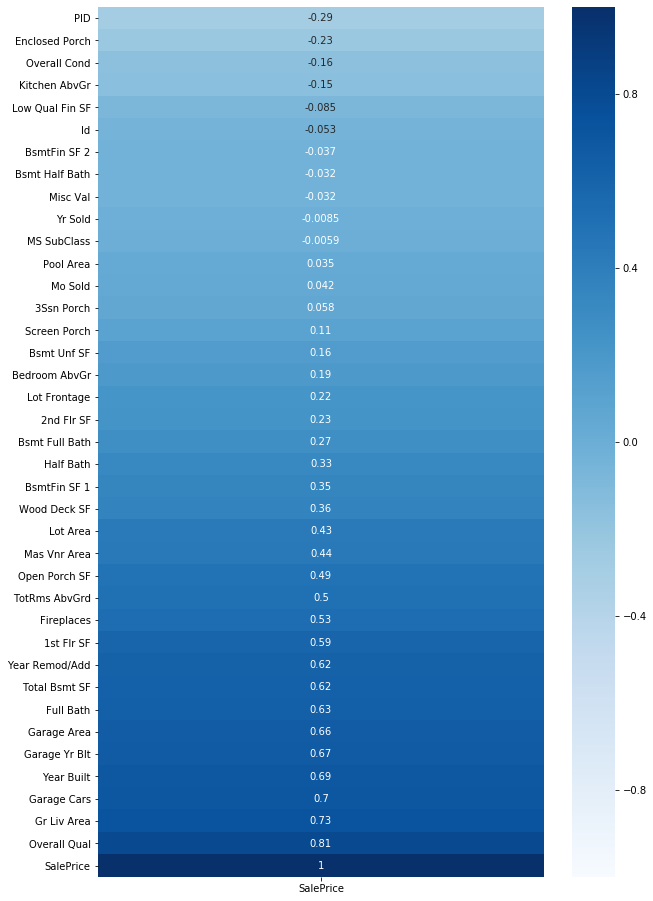

In [37]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [38]:
# before we make dummies for the qualitative features, lets drop the columns of features that we know from the heatmap
# to have very low correlation (drop everything under 50% correlation, both positively AND negatively)
corr_less_pos_50 = (train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice')<.5)  
corr_great_neg_50 = (train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice')>-.5)

drop_cols = corr_less_pos_50 & corr_great_neg_50
drop_cols
#train.columns[0]

,SalePrice
PID,True
Enclosed Porch,True
Overall Cond,True
Kitchen AbvGr,True
Low Qual Fin SF,True
Id,True
BsmtFin SF 2,True
Bsmt Half Bath,True
Misc Val,True
Yr Sold,True


In [39]:
corr = train.corr()[['SalePrice']].sort_values('SalePrice')

In [40]:
corr_features = corr[(corr.SalePrice < 0.5) & (corr.SalePrice > -0.25)]

In [41]:
drop_cols = corr_features.index.values

In [42]:
# train.drop(columns=['PID', 'Enclosed Porch', 'Overall Cond', 'Kitchen AbvGr', 'Low Qual Fin SF', 'Id', 
#                     'BsmtFin SF 2', 'Bsmt Half Bath', 'Misc Val', 'Yr Sold', 'MS SubClass', 'Pool Area', 
#                     'Mo Sold', '3Ssn Porch', 'Screen Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Lot Frontage', 
#                     '2nd Flr SF', 'Bsmt Full Bath', 'Half Bath', 'BsmtFin SF 1', 'Wood Deck SF', 'Lot Area', 
#                     'Mas Vnr Area', 'Open Porch SF'], inplace=True)

In [43]:
train.drop(columns=drop_cols, inplace=True)

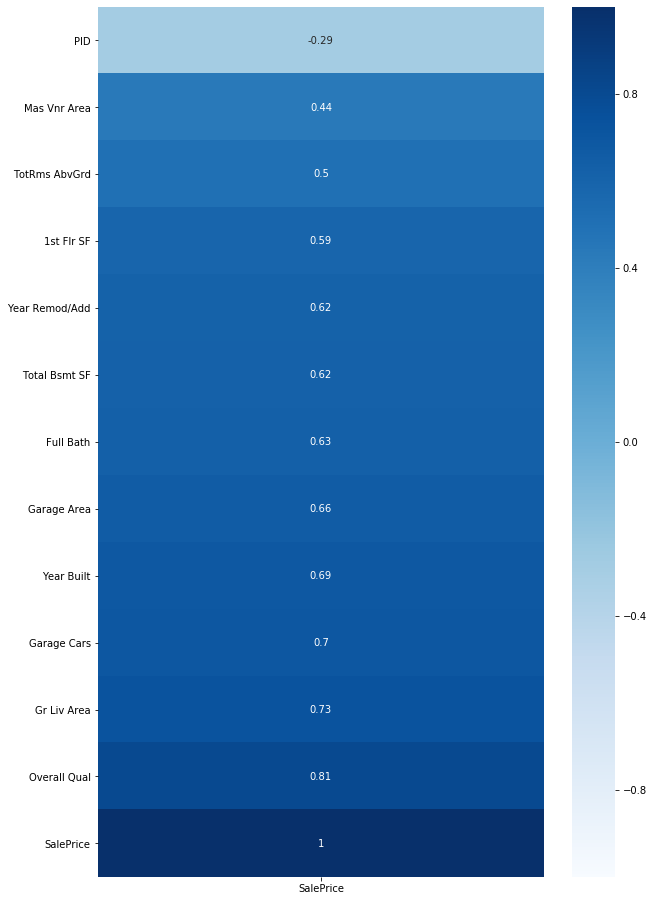

In [44]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [45]:
train.shape

(2051, 55)

In [46]:
train = pd.get_dummies(train, drop_first=True)

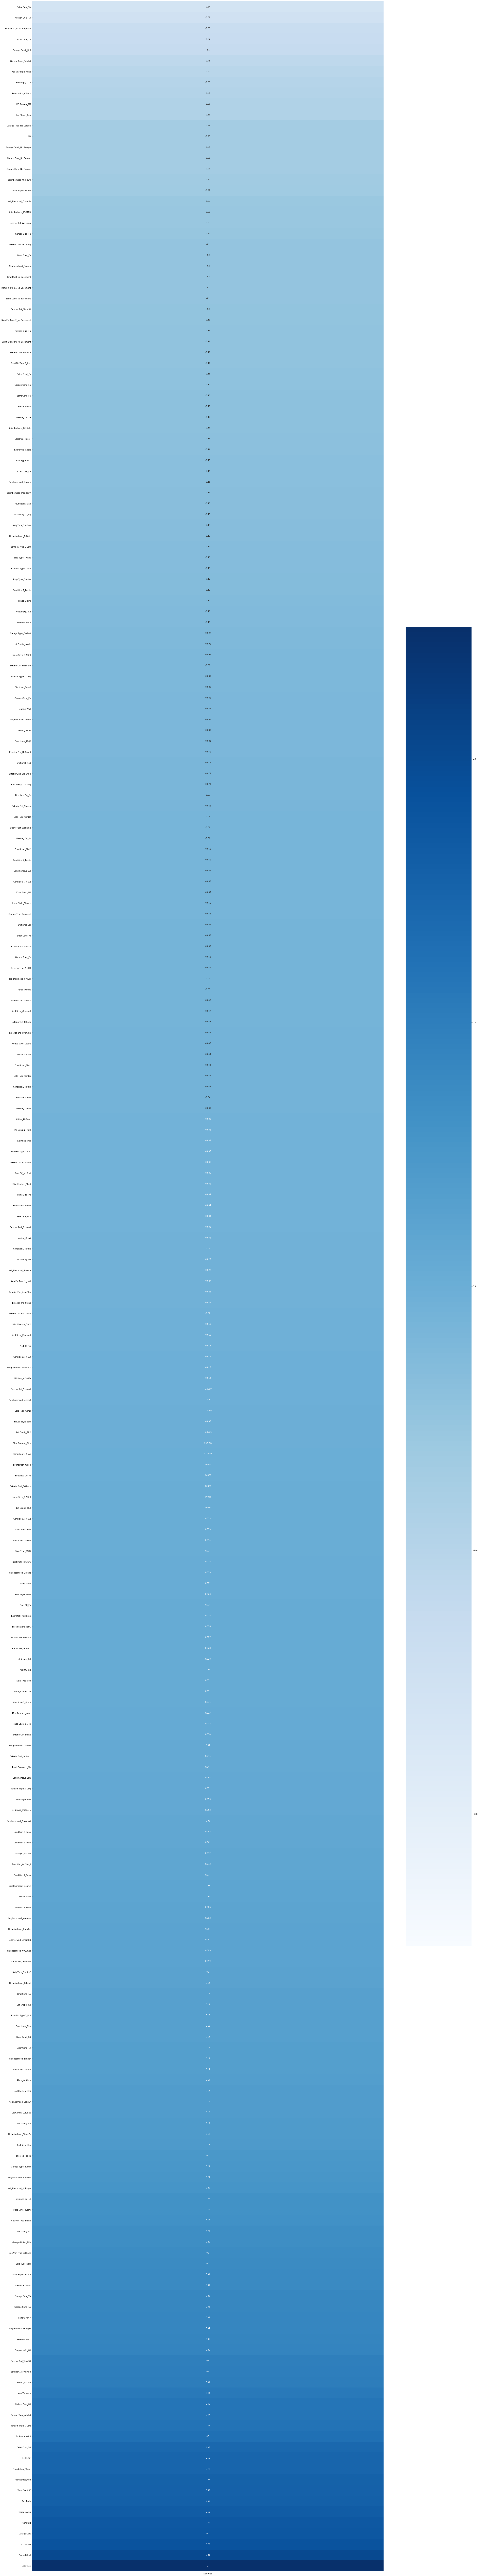

In [47]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(40,240))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [48]:
corr = train.corr()[['SalePrice']].sort_values('SalePrice')

In [49]:
corr_features = corr[(corr.SalePrice < 0.5) & (corr.SalePrice > -0.25)]

In [50]:
drop_cols = corr_features.index.values

In [51]:
train.drop(columns=drop_cols, inplace=True)

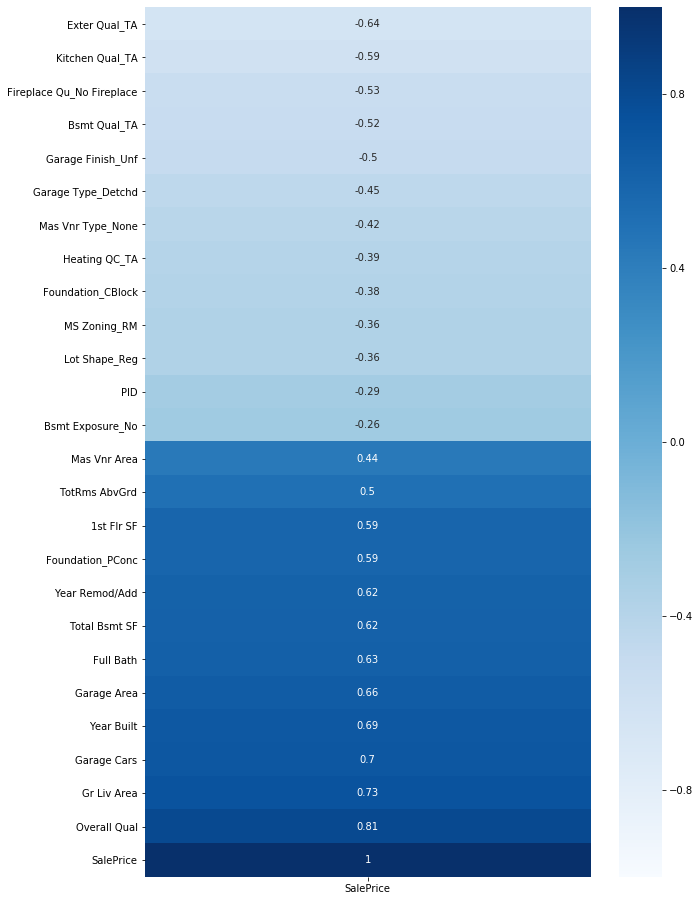

In [52]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [53]:
train.shape

(2051, 26)

In [54]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']
X.head()

,PID,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Exter Qual_TA,Foundation_CBlock,Foundation_PConc,Bsmt Qual_TA,Bsmt Exposure_No,Heating QC_TA,Kitchen Qual_TA,Fireplace Qu_No Fireplace,Garage Type_Detchd,Garage Finish_Unf
0,533352170,6,1976,2005,289.0,725.0,725,1479,2,6,...,0,1,0,1,1,0,0,1,0,0
1,531379050,7,1996,1997,132.0,913.0,913,2122,2,8,...,0,0,1,0,1,0,0,0,0,0
2,535304180,5,1953,2007,0.0,1057.0,1057,1057,1,5,...,1,1,0,1,1,1,0,1,1,1
3,916386060,5,2006,2007,0.0,384.0,744,1444,2,7,...,1,0,1,0,1,0,1,1,0,0
4,906425045,6,1900,1993,0.0,676.0,831,1445,2,6,...,1,0,1,0,1,1,1,1,1,1


In [55]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [56]:
#Use the train_test_split function to split our X and y variables into a training set and a holdout set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [57]:
#we'll want to scale our features for testing Lasso and ridge models
#fit a StandardScaler to X_train and use it to transform both  X_train and X_test
#only Xtrain and Xtest will be fit
ss= StandardScaler()
ss.fit(X_train)  #ONLY FIT TO TRAINING DATA
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) #NOTICE NO FITTING HAPPENED HERE

In [58]:
ss.scale_

array([1.88589968e+08, 1.42803751e+00, 3.01640317e+01, 2.09195528e+01,
       1.75715524e+02, 4.55229772e+02, 4.04259045e+02, 5.07268257e+02,
       5.53090940e-01, 1.56214380e+00, 7.64338515e-01, 2.18195248e+02,
       3.59162006e-01, 4.82618204e-01, 4.88779351e-01, 4.87776316e-01,
       4.93134269e-01, 4.98098644e-01, 4.94668554e-01, 4.73285286e-01,
       4.56418870e-01, 4.99948844e-01, 4.99993236e-01, 4.34318619e-01,
       4.92001359e-01])

In [59]:
#create instance of Linear Regression model
lr = LinearRegression()

In [60]:
#create instance of LASSO model

lasso = LassoCV(cv=5)

In [61]:
#create instance of Ridge model

ridge = RidgeCV()

In [62]:
#test cvs for linreg model
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.7747883100401511

In [63]:
#test cross val score for LASSO model
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean() 

0.7741451312782451

In [64]:
#test cros val score for Ridge model
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean() 

0.7756629708266385

In [65]:
#ridge cv seems to be doing the best so lets try fitting the model to the training data and evaluate training 
# and test model
# fit ridge
ridge.fit(X_train_sc, y_train);

In [66]:
ridge.score(X_train_sc, y_train)

0.7997471810880254

In [67]:
ridge.score(X_test_sc, y_test)

0.8575714148146288

In [68]:
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.7756629708266385

In [69]:
pred = ridge.predict(X_test_sc)

In [70]:
residuals = y_test - pred

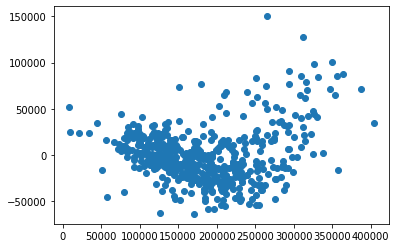

In [71]:
plt.scatter(pred, residuals);